In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=35

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names
n_classes=len(class_names)
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
len(dataset)

68

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].shape)

(32, 256, 256, 3)
[0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 2 1 1 0 1 0 0 0 0 0 0 2 1 2 0 0]
(256, 256, 3)


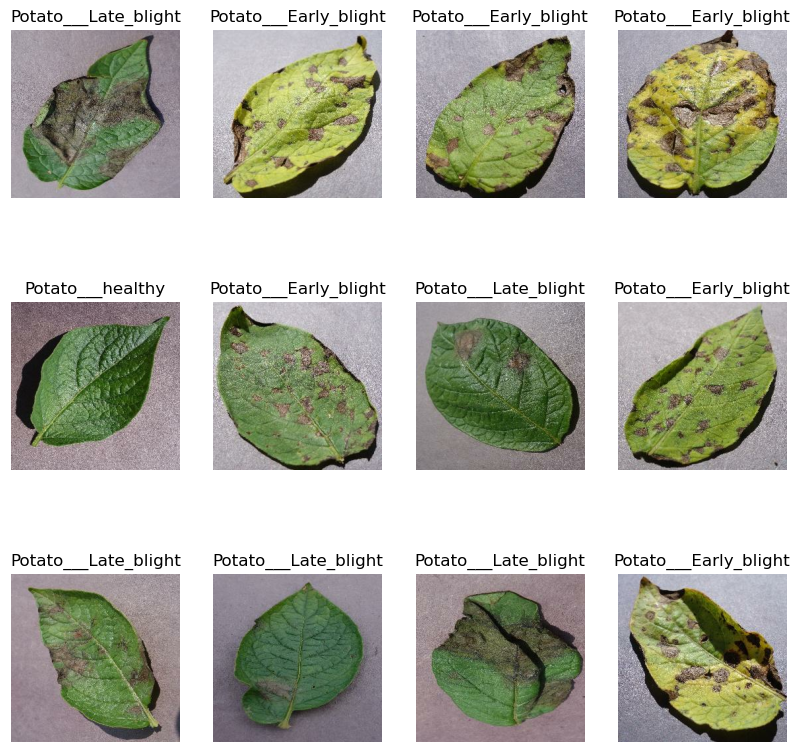

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

80 =>train
10 =>validate
10 =>test

in tf.data.dataset we use take,skip etc to split the data

In [11]:
train_size= 0.8
len(dataset)*train_size
ds_size=len(dataset)

In [12]:
train_size=int(ds_size*train_size)
train_ds=dataset.take(train_size)


In [13]:
tes_val=ds_size-train_size
tes_val

14

In [14]:
test_size=(tes_val/2)+1
test_size
test_ds=dataset.skip(train_size)

In [15]:
def get_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1 ,shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size=int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size+val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
#scaling

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [22]:
data_augumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_amd_vertical"),
    layers.RandomRotation(0.2),
])

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(n_classes, activation = 'softmax')
])
model.build(input_shape=input_shape)

E:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 28800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 3)                     │          86,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,795 (413.26 KB)

 Trainable params: 105,795 (413.26 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.5419 - loss: 0.9861 - val_accuracy: 0.7708 - val_loss: 0.5877
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 992ms/step - accuracy: 0.8499 - loss: 0.4187 - val_accuracy: 0.7865 - val_loss: 0.6956
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 961ms/step - accuracy: 0.8628 - loss: 0.3403 - val_accuracy: 0.8958 - val_loss: 0.2786
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 907ms/step - accuracy: 0.9094 - loss: 0.2205 - val_accuracy: 0.9219 - val_loss: 0.2076
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 917ms/step - accuracy: 0.9373 - loss: 0.1640 - val_accuracy: 0.9115 - val_loss: 0.1671
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 908ms/step - accuracy: 0.9321 - loss: 0.1707 - val_accuracy: 0.8385 - val_loss: 0.3938
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 893ms/step - accuracy: 0.9229 - loss: 0.2004 - val_accuracy: 0.9219 - val_loss: 0.2286
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9294 - loss: 0.1781 - val_accuracy:

In [27]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 319ms/step - accuracy: 0.9883 - loss: 0.0570


In [28]:
scores

[0.05552013963460922, 0.98828125]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

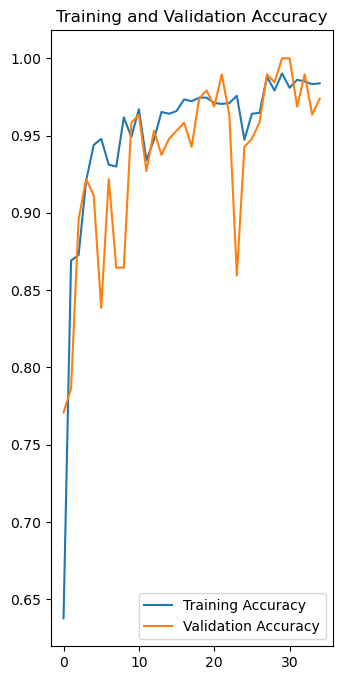

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

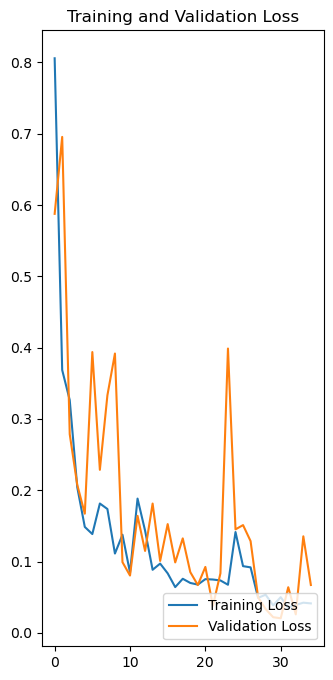

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

first umage to predict
first image's actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Potato___Late_blight


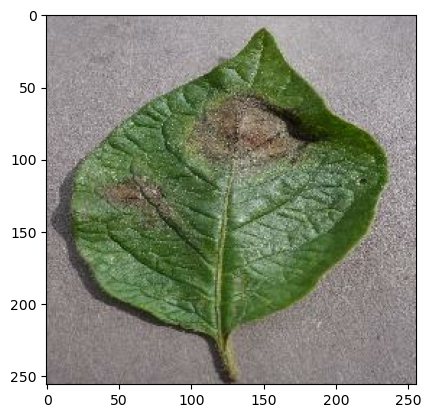

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0]

    print("first umage to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class ,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


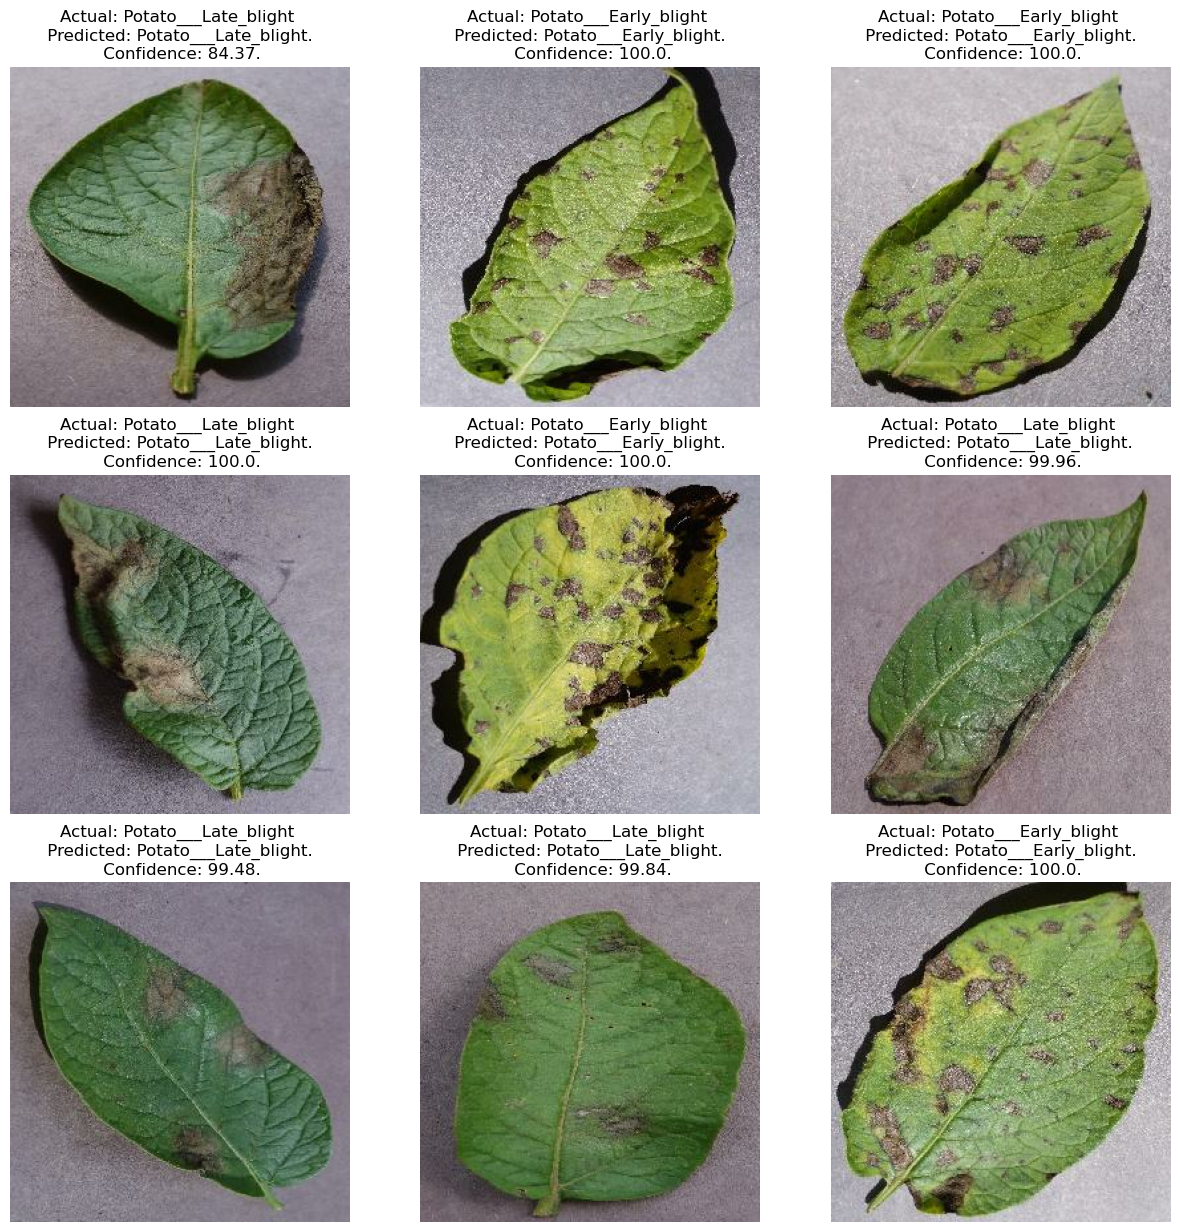

In [37]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class}. \n Confidence: {confidence}.")
          
        
        plt.axis("off")

In [38]:
import os
model_version = max([int(i) for i in os.listdir("../models")+[0] ])+1

model.export(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [ ]:
model_version = 1
save_dir = f"../saved_models/{model_version}"

# Export the model in the `SavedModel` format for TFLite/TFServing/etc.
model.export(save_dir)


In [ ]:
!pip install tensorflow==2.5.0

In [ ]:
pip show tensorflow-serving-api

In [ ]:
pip install tensorflow-serving-api


In [ ]:
pip show tensorflow-serving-api

In [ ]:
pip show tensorflow